In [2]:
import pandas as pd

df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    object        
 1   #Passengers  144 non-null    int64         
 2   Date         144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.5+ KB


In [8]:
df.set_index('Date',inplace=True)

In [10]:
df.head()

,Month,#Passengers
Date,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [11]:
df.drop('Month',axis=1,inplace=True)

In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)

In [13]:
for i in result:
    print(i)

0.8153688792060547
0.9918802434376411
13
130
{'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
996.692930839019


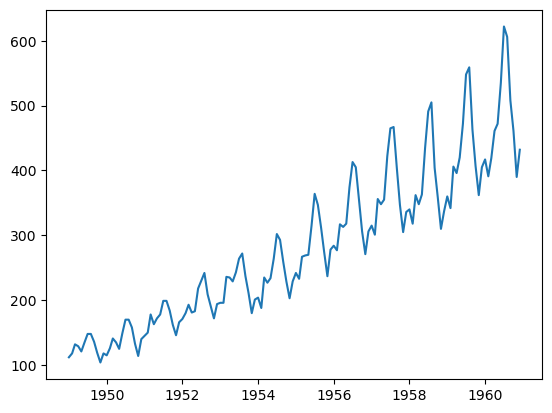

In [15]:
import matplotlib.pyplot as plt
plt.plot(df)

In [19]:
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing

model = ExponentialSmoothing(df, seasonal='add',trend= 'add')
res = model.fit()

/home/aswin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
pred = res.forcast

TypeError: HoltWintersResults.predict() got an unexpected keyword argument 'steps'

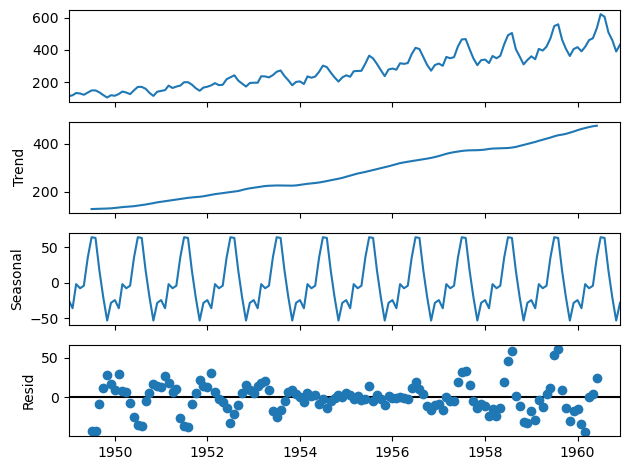

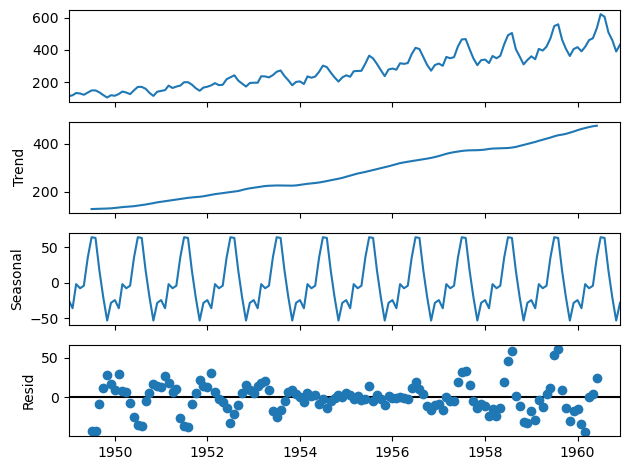

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df).plot()